# Hierarchical Agglomerative Clustering and DBSCAN Clustering

1) Using sklearn agglometarive clustering on a customer segmentation problem

2) Using sklearn DBSCAN clustering on make_moons data

## 1) Using sklearn agglometarive clustering on a customer segmentation problem

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

In [29]:
data = pd.read_csv('shopping-data.csv')
data.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
data_X = data.iloc[:, 3:5].values
data_X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

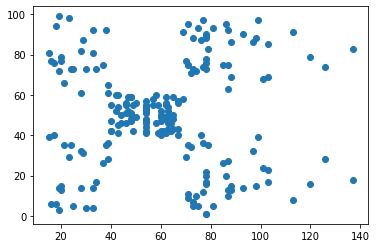

In [32]:
plt.scatter(data_X[:, 0], data_X[:, 1]);

---

We use different linkage methods between two clusters to create a dendogram. 

We observe clustering solution quality from the dendrogram based on cohesion and separation. 

---

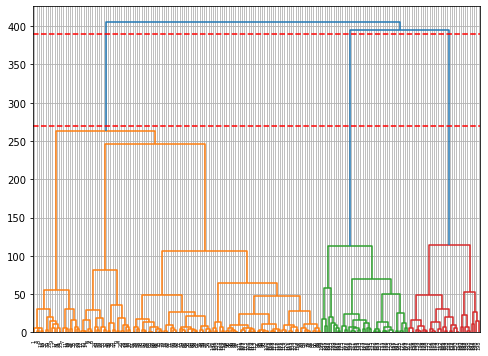

In [39]:
plt.figure(figsize=(8,6))
#dendrogram(linkage(data_X, method='single'));
#dendrogram(linkage(data_X, method='average'));
dendrogram(linkage(data_X, method='ward'));
plt.axhline(y=390, color='r', linestyle='--')
plt.axhline(y=270, color='r', linestyle='--')
plt.grid();

In [40]:
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster.fit_predict(data_X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

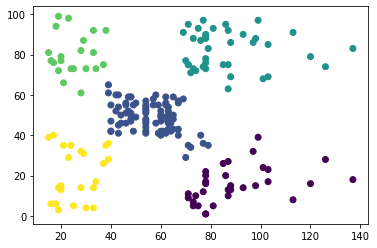

In [41]:
plt.scatter(data_X[:, 0], data_X[:, 1], c=agg_cluster.labels_);

---

The silhouette coefficient for a data instance incorporates both cohesion and separation.

The silhoutte score is defined as the average of silhouttee coefficients across all data instances. 

---

In [42]:
silhouette_score(data_X, agg_cluster.labels_)

0.5529945955148897

---

The cophenetic coefficient gives correlation between the distances of data points in the feature space
and their distances on the dendogram.

---

In [43]:
cophenet(linkage(data_X, metric='euclidean', method='ward'), pdist(data_X))

(0.7179298392392908,
 array([262.5626341 ,  81.17935867, 262.5626341 , ..., 394.8596576 ,
         17.82320585, 394.8596576 ]))

---

Let's compare the above clustering solution obtained using agglomerative clustering with the 
clustering solution from K-means.

---

In [44]:
km = KMeans(n_clusters=5)
km.fit_predict(data_X)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

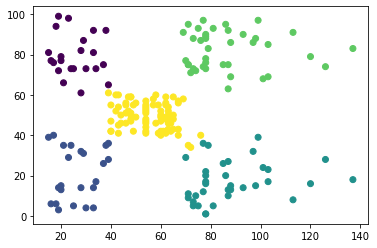

In [45]:
plt.scatter(data['Annual Income'], data['Spending Score'], c=km.labels_);

In [13]:
contingency_matrix(km.labels_, agg_cluster.labels_)

array([[ 0,  1,  0, 21,  0],
       [ 0, 81,  0,  0,  0],
       [ 0,  0, 39,  0,  0],
       [32,  3,  0,  0,  0],
       [ 0,  0,  0,  0, 23]], dtype=int64)

## 2) Using sklearn DBSCAN clustering on make_moons data

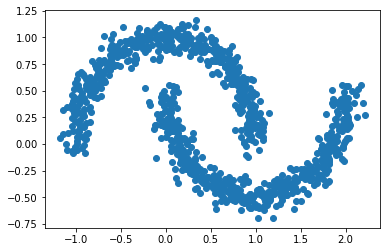

In [54]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples = 1000, 
                  noise = 0.08, 
                  random_state=42)

plt.scatter(X[:, 0], X[:, 1]);

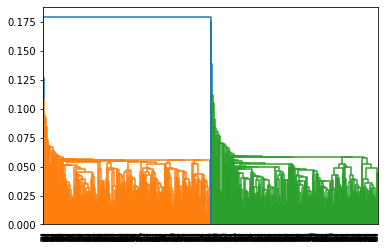

In [56]:
#dendrogram(linkage(X, metric='euclidean', method='ward'));
dendrogram(linkage(X, metric='euclidean', method='single'));

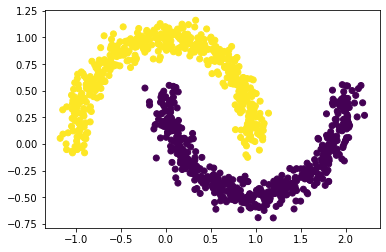

In [57]:
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
agg_cluster.fit(X)

plt.scatter(X[:,0], X[:, 1], c=agg_cluster.labels_);

In [58]:
dbscan = DBSCAN(eps=0.065, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.065, min_samples=4)

In [18]:
dbscan.labels_

array([ 0,  0,  1, -1,  2,  0,  0,  0,  0,  2,  0,  2,  0,  0,  3,  0,  2,
        0,  0,  2,  0,  2,  2,  0,  2,  2,  2, -1,  0,  0,  2,  2,  0,  2,
        2, -1,  0,  0,  0,  2, -1,  2,  2, -1,  2,  2,  0,  0,  2,  0,  0,
        0,  2,  0,  2,  2,  0,  2,  2,  0,  2,  2,  0,  2,  0,  0,  0,  0,
        2,  0,  2,  2,  0,  0,  2,  2,  0,  2,  0,  2,  0,  2,  2,  2,  2,
        0, -1,  0,  0,  2,  2,  2,  0,  2,  0,  2,  0,  2,  2, -1, -1, -1,
        0,  2,  0,  0,  0,  0,  2,  0,  0,  0, -1,  0,  2,  2,  2,  0,  0,
        2,  0,  2,  0,  2,  2,  0,  0,  2,  0,  0,  0,  0, -1, -1,  0,  2,
        2,  2,  2,  2,  2,  2,  1,  2,  0,  0,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  2,  0,  2,  0, -1,  0,  0,  0,  0,  0,  2,  0,  2,  2,
        2,  2,  2,  0,  2,  2,  2,  2,  0,  0,  2,  0,  2,  0, -1,  2,  2,
        2,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  0,  2,  2,  0,  0,  0,
        0,  0,  2,  0, -1,  0,  2,  2,  0,  0,  0,  5,  0,  2,  0,  0,  2,
        0,  0,  2,  0,  2

In [59]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([ 72, 441,   6, 465,   7,   3,   6], dtype=int64))

In [60]:
# dbscan.core_sample_indices_
len(dbscan.core_sample_indices_)

875

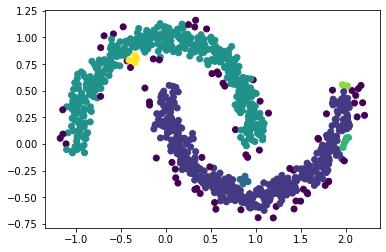

In [61]:
plt.scatter(X[:,0], X[:, 1], c=dbscan.labels_);

In [70]:
dbscan = DBSCAN(eps=0.075, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.075, min_samples=4)

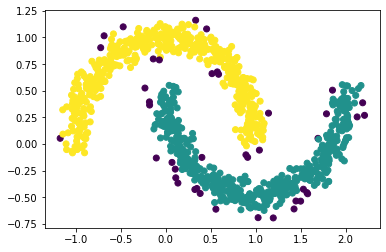

In [71]:
plt.scatter(X[:,0], X[:, 1], c=dbscan.labels_);

In [66]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [67]:
indices

array([[  0, 958, 625],
       [  1, 398,  18],
       [  2, 613, 693],
       ...,
       [997, 594, 131],
       [998, 424, 469],
       [999, 348, 664]], dtype=int64)

In [68]:
distances

array([[0.        , 0.01618128, 0.02554161],
       [0.        , 0.03112791, 0.04012666],
       [0.        , 0.03423102, 0.05683446],
       ...,
       [0.        , 0.03030336, 0.03379083],
       [0.        , 0.03653811, 0.03963574],
       [0.        , 0.02052545, 0.02698143]])

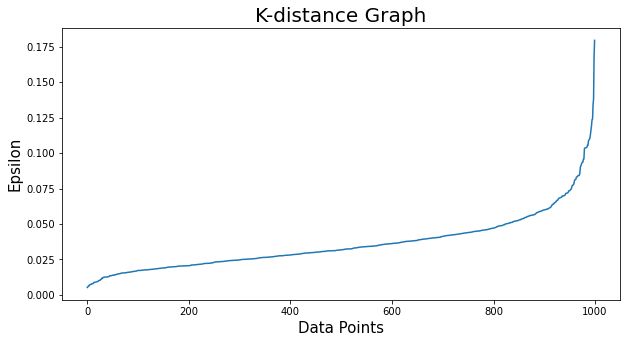

In [69]:
dist = np.sort(distances[:,2])
plt.figure(figsize=(10,5))
plt.plot(dist)
plt.title("K-distance Graph",fontsize=20)
plt.xlabel("Data Points",fontsize=15)
plt.ylabel("Epsilon",fontsize=15);